In [1]:
import numpy as np
import matplotlib.pyplot as plt

from disba import PhaseDispersion, GroupDispersion, EigenFunction, PhaseSensitivity, GroupSensitivity

In [2]:
# Velocity model
# thickness, Vp, Vs, density
# km, km/s, km/s, g/cm3
velocity_model = np.array([
   [10.0, 7.00, 3.50, 2.00],
   [10.0, 6.80, 3.40, 2.00],
   [10.0, 7.00, 3.50, 2.00],
   [10.0, 7.60, 3.80, 2.00],
   [10.0, 8.40, 4.20, 2.00],
   [10.0, 9.00, 4.50, 2.00],
   [10.0, 9.40, 4.70, 2.00],
   [10.0, 9.60, 4.80, 2.00],
   [10.0, 9.50, 4.75, 2.00],
])


In [18]:
# Periods must be sorted starting with low periods
t = np.logspace(0.0, 3.0, 100)

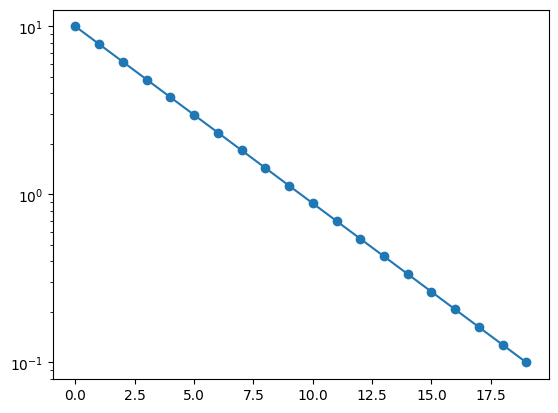

In [19]:
plt.semilogy(1/t, '-o')

In [20]:
# Compute the 3 first Rayleigh- and Love- wave modal dispersion curves
# Fundamental mode corresponds to mode 0
pd = PhaseDispersion(*velocity_model.T)


In [21]:
cpr = [pd(t, mode=i, wave="rayleigh") for i in range(3)]
cpl = [pd(t, mode=i, wave="love") for i in range(3)]

# pd returns a namedtuple (period, velocity, mode, wave, type)

Text(0.5, 1.0, 'Love-wave')

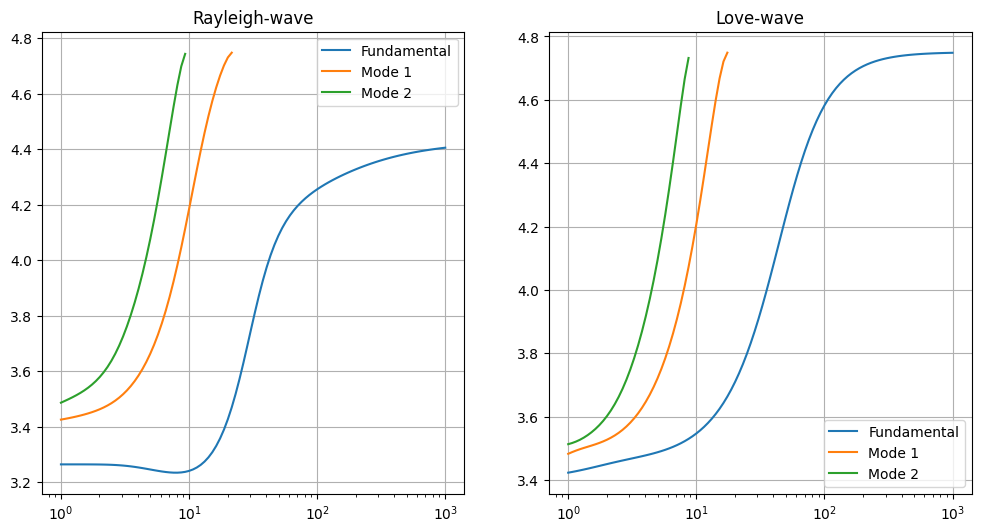

In [66]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.semilogx(cpr[0].period, cpr[0].velocity, label = 'Fundamental')
plt.semilogx(cpr[1].period, cpr[1].velocity, label = 'Mode 1')
plt.semilogx(cpr[2].period, cpr[2].velocity, label = 'Mode 2')
plt.grid()
plt.legend()
plt.title('Rayleigh-wave')

plt.subplot(122)
plt.semilogx(cpl[0].period, cpl[0].velocity, label = 'Fundamental')
plt.semilogx(cpl[1].period, cpl[1].velocity, label = 'Mode 1')
plt.semilogx(cpl[2].period, cpl[2].velocity, label = 'Mode 2')
plt.grid()
plt.legend()
plt.title('Love-wave')

In [67]:
# Compute the 3 first Rayleigh- and Love- wave modal dispersion curves
# Fundamental mode corresponds to mode 0
gd = GroupDispersion(*velocity_model.T)


In [68]:
cgr = [gd(t, mode=i, wave="rayleigh") for i in range(3)]
cgl = [gd(t, mode=i, wave="love") for i in range(3)]

# pd returns a namedtuple (period, velocity, mode, wave, type)

Text(0.5, 1.0, 'Love-wave')

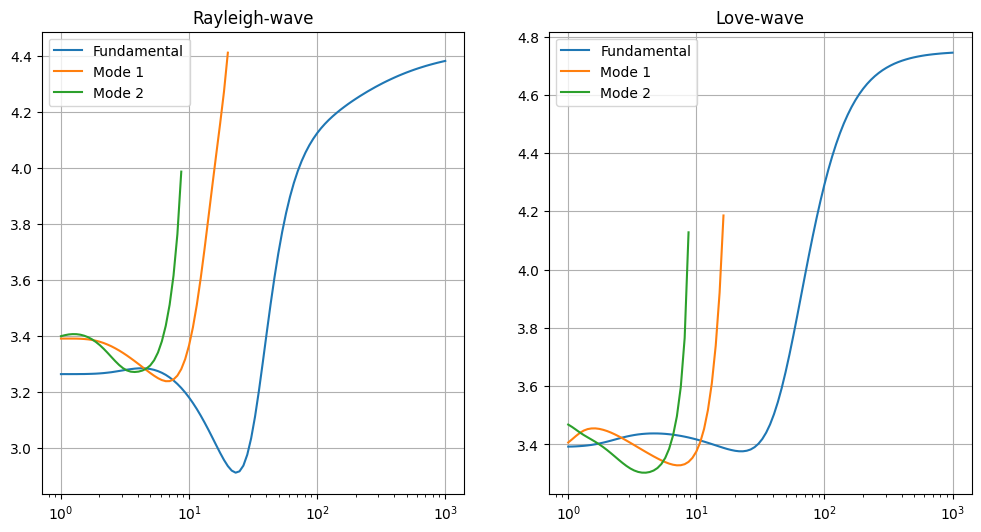

In [69]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.semilogx(cgr[0].period, cgr[0].velocity, label = 'Fundamental')
plt.semilogx(cgr[1].period, cgr[1].velocity, label = 'Mode 1')
plt.semilogx(cgr[2].period, cgr[2].velocity, label = 'Mode 2')
plt.grid()
plt.legend()
plt.title('Rayleigh-wave')

plt.subplot(122)
plt.semilogx(cgl[0].period, cgl[0].velocity, label = 'Fundamental')
plt.semilogx(cgl[1].period, cgl[1].velocity, label = 'Mode 1')
plt.semilogx(cgl[2].period, cgl[2].velocity, label = 'Mode 2')
plt.grid()
plt.legend()
plt.title('Love-wave')

In [70]:
eigf = EigenFunction(*velocity_model.T)
eigr = eigf(20.0, mode=0, wave="rayleigh")
eigl = eigf(20.0, mode=0, wave="love")

# eigf returns a namedtuple
#  - (depth, ur, uz, tz, tr, period, mode) for Rayleigh-wave
#  - (depth, uu, tt, period, mode) for Love-wave

In [5]:
ps = PhaseSensitivity(*velocity_model.T)
parameters = ["thickness", "velocity_p", "velocity_s", "density"]
skr = [ps(20.0, mode=0, wave="rayleigh", parameter=parameter) for parameter in parameters]
skl = [ps(20.0, mode=0, wave="love", parameter=parameter) for parameter in parameters]

# ps returns a namedtuple (depth, kernel, period, velocity, mode,wave, type, parameter)

Text(0.5, 1.0, 'Rayleigh-wave')

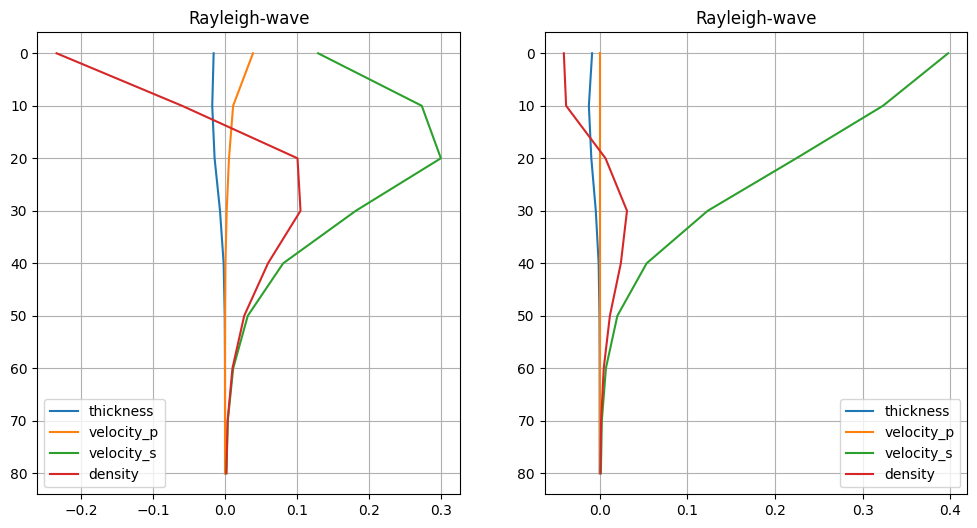

In [8]:
plt.figure(figsize=(12, 6))
plt.subplot(121)

for s in skr:
    plt.plot(s.kernel, s.depth, label = s.parameter)

plt.legend()
plt.grid()
plt.gca().invert_yaxis()
plt.title('Rayleigh-wave')

plt.subplot(122)
for s in skl:
    plt.plot(s.kernel, s.depth, label = s.parameter)

plt.legend()
plt.grid()
plt.gca().invert_yaxis()
plt.title('Rayleigh-wave')


In [9]:
gs = GroupSensitivity(*velocity_model.T)
parameters = ["thickness", "velocity_p", "velocity_s", "density"]
skr = [gs(20.0, mode=0, wave="rayleigh", parameter=parameter) for parameter in parameters]
skl = [gs(20.0, mode=0, wave="love", parameter=parameter) for parameter in parameters]

# ps returns a namedtuple (depth, kernel, period, velocity, mode,wave, type, parameter)

Text(0.5, 1.0, 'Rayleigh-wave')

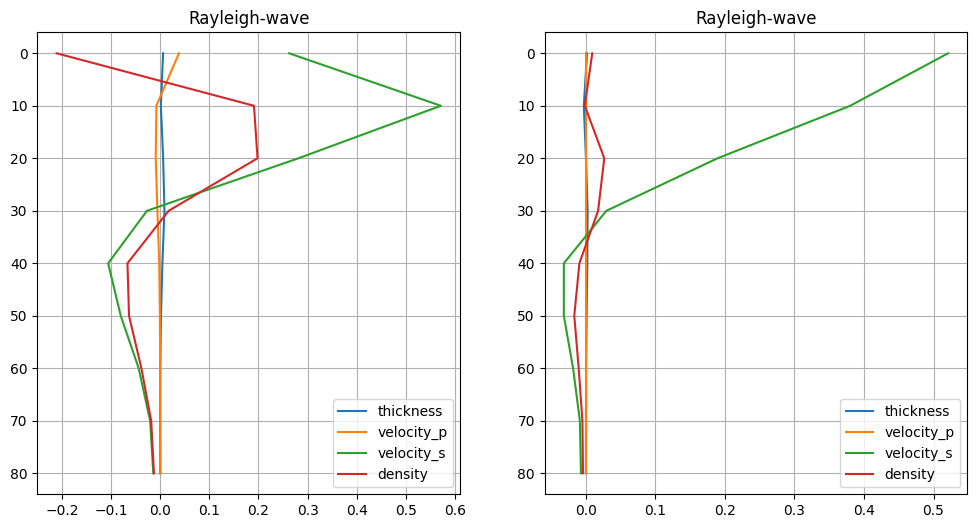

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(121)

for s in skr:
    plt.plot(s.kernel, s.depth, label = s.parameter)

plt.legend()
plt.grid()
plt.gca().invert_yaxis()
plt.title('Rayleigh-wave')

plt.subplot(122)
for s in skl:
    plt.plot(s.kernel, s.depth, label = s.parameter)

plt.legend()
plt.grid()
plt.gca().invert_yaxis()
plt.title('Rayleigh-wave')
